In [1]:
!pip install keras

In [2]:
!pip install tensorflow

In [3]:
from pylab import *

In [4]:
#import necessary libraries

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_files
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import array_to_img, img_to_array, load_img
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D
from keras.layers import Activation, Dense, Flatten, Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
from keras import backend as K

In [5]:
# Loading data and putting them into training and test sets

#locations setting for training and test datasets
train_data='C:/Users/themo/Desktop/btp/fruits-360_dataset/fruits-360/Training'
test_data='C:/Users/themo/Desktop/btp/fruits-360_dataset/fruits-360/Test'

#creates X_train and Y_train using file_names and folders
def get_data(path):
    data = load_files(path)
    files = np.array(data['filenames'])
    targets = np.array(data['target'])
    target_labels = np.array(data['target_names'])
    return files,targets,target_labels

X_train, Y_train, labels = get_data(train_data)
X_test, Y_test,_ = get_data(test_data)

In [6]:
X_train

array(['C:/Users/themo/Desktop/btp/fruits-360_dataset/fruits-360/Training\\Cherry 2\\r_263_100.jpg',
       'C:/Users/themo/Desktop/btp/fruits-360_dataset/fruits-360/Training\\Nut Pecan\\73_100.jpg',
       'C:/Users/themo/Desktop/btp/fruits-360_dataset/fruits-360/Training\\Melon Piel de Sapo\\r_45_100.jpg',
       ...,
       'C:/Users/themo/Desktop/btp/fruits-360_dataset/fruits-360/Training\\Pear Stone\\r2_206_100.jpg',
       'C:/Users/themo/Desktop/btp/fruits-360_dataset/fruits-360/Training\\Pear 2\\r2_292_100.jpg',
       'C:/Users/themo/Desktop/btp/fruits-360_dataset/fruits-360/Training\\Pear Forelle\\288_100.jpg'],
      dtype='<U99')

In [7]:
Y_train

array([27, 73, 68, ..., 90, 84, 86])

In [8]:
Y_test

array([107,  64,  88, ...,  58,  64,  16])

In [9]:
Y_train = np_utils.to_categorical(Y_train, 131)
Y_test = np_utils.to_categorical(Y_test, 131)

In [10]:
# splitting train set into training and validation sets

X_train, X_val = train_test_split(X_train, test_size=0.2, random_state=33)
Y_train, Y_val = train_test_split(Y_train, test_size=0.2, random_state=33)

In [11]:
X_train

array(['C:/Users/themo/Desktop/btp/fruits-360_dataset/fruits-360/Training\\Apple Red Yellow 1\\106_100.jpg',
       'C:/Users/themo/Desktop/btp/fruits-360_dataset/fruits-360/Training\\Grape White 4\\245_100.jpg',
       'C:/Users/themo/Desktop/btp/fruits-360_dataset/fruits-360/Training\\Apricot\\127_100.jpg',
       ...,
       'C:/Users/themo/Desktop/btp/fruits-360_dataset/fruits-360/Training\\Pomegranate\\r_129_100.jpg',
       'C:/Users/themo/Desktop/btp/fruits-360_dataset/fruits-360/Training\\Pear Kaiser\\182_100.jpg',
       'C:/Users/themo/Desktop/btp/fruits-360_dataset/fruits-360/Training\\Apple Crimson Snow\\r_222_100.jpg'],
      dtype='<U99')

In [12]:
#sanity check for shape

X_val.shape

(13539,)

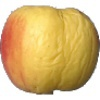

In [13]:
load_img(X_train[0])

Now that we have created separate Xs and ys for training and test, lets load the images into array format ( using pixel values)

In [14]:
#converting images into array to start computation

def convert_image_to_array(files):
    images_as_array=[]
    for file in files:
        images_as_array.append(img_to_array(load_img(file)))
    return images_as_array

X_train = np.array(convert_image_to_array(X_train))
X_val = np.array(convert_image_to_array(X_val))
X_test = np.array(convert_image_to_array(X_test))

We will normalize our inputs y using division by 255 since 255 is the maximum possible pixel values. Normalizing inputs helps neural networks run faster else it goes around like a ball in a bowl.

In [15]:
#nomalizing the pixel values before feeding into a neural network

X_train = X_train.astype('float32')/255
X_val = X_val.astype('float32')/255
X_test = X_test.astype('float32')/255

**Approach 1** - **Customized CNN**

Now, let us start with our first approach that is using a customized Convolutional Neural Networks. **CNNs** are amazing techniques that helps a neural network learn **spatial and related features**. Before CNNs came, spatial information was tough to get learnt into a neural network since all the data was fed in a flatten format. CNNs helps neural network to learn the relationships between varios areas of an image like Edges, eyes etc. The **more futher deep the neural networl goes, the more complex features** are learnt.

Here, as approach 1, we will use 2 X 2 filters and increase the number of layers the deeper we go along with 2 X 2 maxpooling layer which chooses the maximum value at a certain area.

We will use RELU activation function to remove linearity to learn complex features.

We will use **dropout** regularization which chooses a node using a probability that we will define and it will help prevent overfitting the model.

Finally, a **softmax** unit will be used to classify and find the loss function.

In [16]:
#Building model 1 using customized convolutional and pooling layers

model = Sequential()

#input_shape is 100*100 since thats the dimension of each of the fruit images
model.add(Conv2D(filters = 16, kernel_size = 2,input_shape=(100,100,3),padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters = 32,kernel_size = 2,activation= 'relu',padding='same'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters = 64,kernel_size = 2,activation= 'relu',padding='same'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters = 128,kernel_size = 2,activation= 'relu',padding='same'))
model.add(MaxPooling2D(pool_size=2))

# specifying parameters for fully connected layer
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(150))
model.add(Activation('relu'))
model.add(Dropout(0.4))
model.add(Dense(131,activation = 'softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 100, 16)      208       
                                                                 
 activation (Activation)     (None, 100, 100, 16)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 50, 50, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 50, 32)        2080      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 25, 25, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 25, 25, 64)        8

In order to speed up our training, we will use **Adam optimizer** instead of Stochastic Gradient descent. Adam takes the advantage of both the momentum and rmsprop by leading us fast to the optimized values.

In [17]:
#importing ootimizers

from keras.optimizers import SGD, Adam, RMSprop

optimizer = Adam()
model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

Its time to fit our model. We will use a **batch size of 128** and check for **20 epochs**.

In [18]:
# creating a file to save the trained CNN model 
checkpointer = ModelCheckpoint(filepath = 'cnn_from_scratch_fruits.hdf5', verbose = 1, save_best_only = True)

# fitting model using above defined layers 
CNN_model = model.fit(X_train,Y_train,
        batch_size = 128,
        epochs=20,
        validation_data=(X_val, Y_val),
        callbacks = [checkpointer],
        verbose=2, shuffle=True)

Epoch 1/20

Epoch 1: val_loss improved from inf to 0.16185, saving model to cnn_from_scratch_fruits.hdf5
424/424 - 122s - loss: 1.9852 - accuracy: 0.4863 - val_loss: 0.1618 - val_accuracy: 0.9569 - 122s/epoch - 287ms/step
Epoch 2/20

Epoch 2: val_loss improved from 0.16185 to 0.04396, saving model to cnn_from_scratch_fruits.hdf5
424/424 - 116s - loss: 0.4392 - accuracy: 0.8526 - val_loss: 0.0440 - val_accuracy: 0.9900 - 116s/epoch - 272ms/step
Epoch 3/20

Epoch 3: val_loss improved from 0.04396 to 0.02413, saving model to cnn_from_scratch_fruits.hdf5
424/424 - 116s - loss: 0.2809 - accuracy: 0.9036 - val_loss: 0.0241 - val_accuracy: 0.9949 - 116s/epoch - 274ms/step
Epoch 4/20

Epoch 4: val_loss improved from 0.02413 to 0.01708, saving model to cnn_from_scratch_fruits.hdf5
424/424 - 116s - loss: 0.2050 - accuracy: 0.9286 - val_loss: 0.0171 - val_accuracy: 0.9956 - 116s/epoch - 274ms/step
Epoch 5/20

Epoch 5: val_loss improved from 0.01708 to 0.00909, saving model to cnn_from_scratch_fru

In [19]:
#loading saved weights to use further

model.load_weights('cnn_from_scratch_fruits.hdf5')


Lets check the score of our model in the test set.

In [20]:
#checking testset accuracy

score = model.evaluate(X_test, Y_test)
print('Test accuracy:', score[1])

709/709 [==============================] - 13s 19ms/step - loss: 0.1191 - accuracy: 0.9819
Test accuracy: 0.9818847179412842


Well, it gave an **amazing result with an accuracy of 0.995** which is tough even for a human eye it seems. Just imagine the power of deep elarning and neural networks.

To gain some more excitement, let us visualize tha names of the fruits it predicted along with the actual names and the images.

709/709 [==============================] - 13s 18ms/step


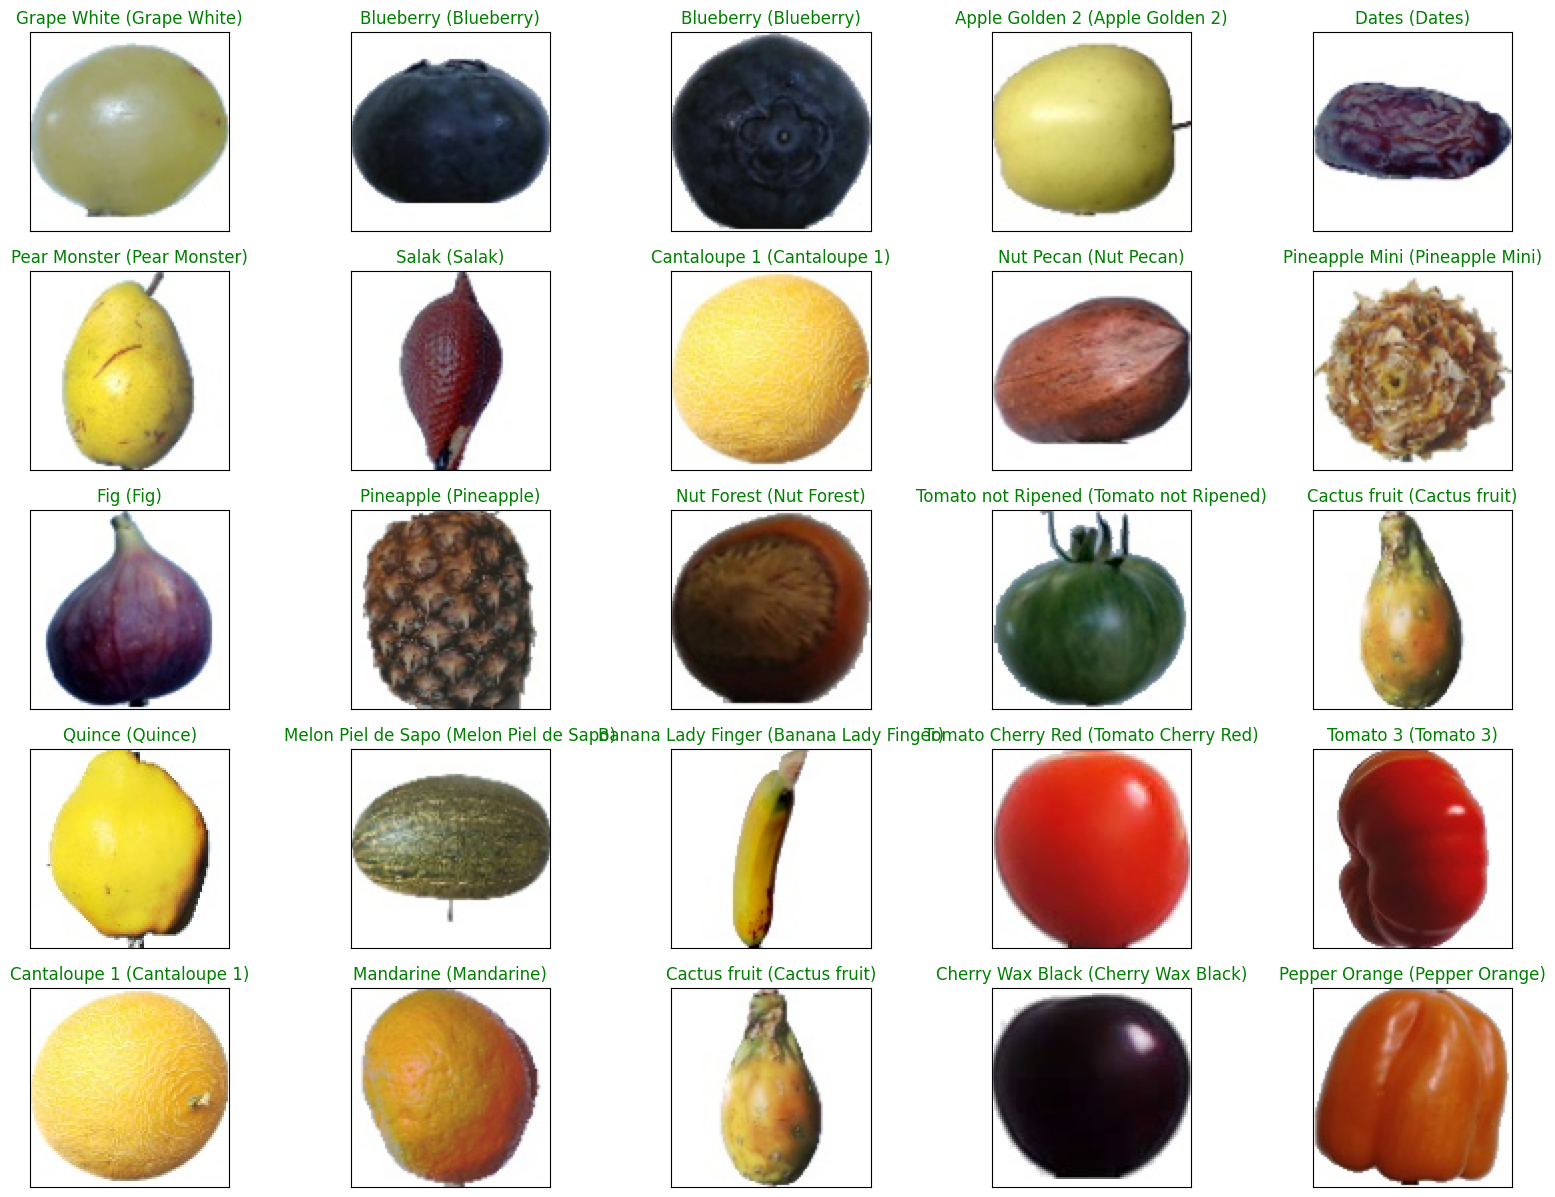

In [21]:
# using model to predict on test data
Y_pred = model.predict(X_test)

# Lets plot the predictions of different fruits and check their original labels

fig = plt.figure(figsize=(20, 15))
for i, idx in enumerate(np.random.choice(X_test.shape[0], size=25, replace=False)):
    ax = fig.add_subplot(5, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(X_test[idx]))
    pred_idx = np.argmax(Y_pred[idx])
    true_idx = np.argmax(Y_test[idx])
    ax.set_title("{} ({})".format(labels[pred_idx], labels[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))

Now, let us see how the loss function an accuracy changes as the model trains for 20 epochs

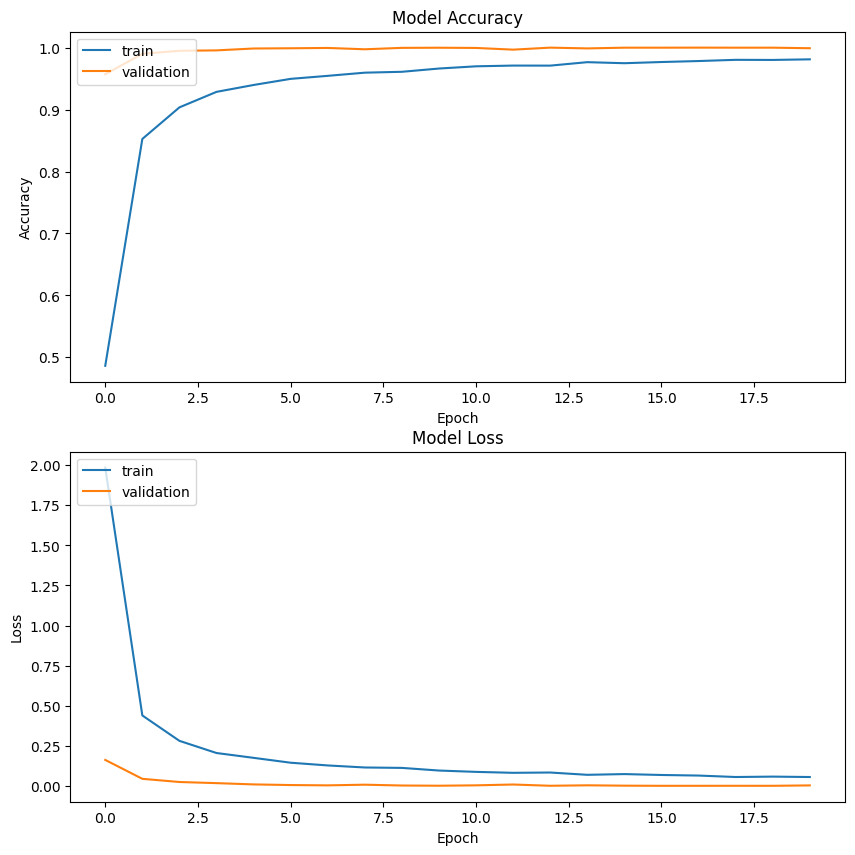

In [22]:
#plotting the loss function and accuracy for different epochs

plt.figure(1, figsize = (10, 10))  
plt.subplot(211)  
plt.plot(CNN_model.history['accuracy'])  
plt.plot(CNN_model.history['val_accuracy'])  
plt.title('Model Accuracy')  
plt.ylabel('Accuracy')  
plt.xlabel('Epoch')  
plt.legend(['train', 'validation'], loc='upper left')   

# plotting model loss 
plt.subplot(212)  
plt.plot(CNN_model.history['loss'])  
plt.plot(CNN_model.history['val_loss'])  
plt.title('Model Loss')  
plt.ylabel('Loss')  
plt.xlabel('Epoch')  
plt.legend(['train', 'validation'], loc='upper left')  
plt.show()

**Approach 2 **: **Using Transfer Learning for base layer and adding more convulutional and pooling layers**

In this approach, we will use transfer learning to prepare our base layer. **VGG16** is a neural network architecture that was trained on the **imagenet** dataset to classify 1000 different images and we will use the weights already trained on VGG16 for our approach 2



In [23]:
#importing vgg16

#Part 2 using transfer learning

#importing vgg16 architecture which is trained on Imagenet

from keras.applications.vgg16 import VGG16

vgg_model = VGG16(input_shape=[100,100,3], weights='imagenet', include_top=False)

We will freeze our base layer as we only want to train the layers which we are gonna add later.

In [24]:
#We will not train the layers imported.

for layer in vgg_model.layers:
   layer.trainable = False

In [25]:
#summary of the imported vgg model

vgg_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100, 100, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 100, 100, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 100, 100, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 50, 50, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 50, 50, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 50, 50, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 25, 25, 128)       0     

We will add one convolutional layers with 1024 filters to the vgg model follwed by a maxpooling and dense layers and fit the model on the fruits dataset and follow the same procedure as above.

In [26]:
#adding some layers to the vgg_model imported and again fitting the model to check the performance

transfer_learning_model = Sequential()
 
transfer_learning_model.add(vgg_model)


transfer_learning_model.add(Conv2D(1024, kernel_size=3, padding='same'))

transfer_learning_model.add(Activation('relu'))

transfer_learning_model.add(MaxPooling2D(pool_size=(2, 2)))
transfer_learning_model.add(Dropout(0.3))

transfer_learning_model.add(Flatten())
transfer_learning_model.add(Dense(150))
transfer_learning_model.add(Activation('relu'))
transfer_learning_model.add(Dropout(0.4))
transfer_learning_model.add(Dense(131,activation = 'softmax'))
transfer_learning_model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 3, 3, 512)         14714688  
                                                                 
 conv2d_4 (Conv2D)           (None, 3, 3, 1024)        4719616   
                                                                 
 activation_2 (Activation)   (None, 3, 3, 1024)        0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 1, 1, 1024)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 1, 1, 1024)        0         
                                                                 
 flatten_1 (Flatten)         (None, 1024)              0         
                                                      

In [27]:
from keras.optimizers import SGD, Adam, RMSprop

optimizer = Adam()
transfer_learning_model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

In [28]:
#fitting the new model


checkpointer = ModelCheckpoint(filepath = 'transfer_learning.hdf5', verbose = 1, save_best_only = True)

# running 
transfer_learning_cnn = transfer_learning_model.fit(X_train,Y_train,
        batch_size = 128,
        epochs=20,
        validation_data=(X_val, Y_val),
        callbacks = [checkpointer],
        verbose=2, shuffle=True)

Epoch 1/20

Epoch 1: val_loss improved from inf to 0.10480, saving model to transfer_learning.hdf5
424/424 - 1321s - loss: 1.7044 - accuracy: 0.5840 - val_loss: 0.1048 - val_accuracy: 0.9846 - 1321s/epoch - 3s/step
Epoch 2/20

Epoch 2: val_loss improved from 0.10480 to 0.02428, saving model to transfer_learning.hdf5
424/424 - 1313s - loss: 0.2336 - accuracy: 0.9315 - val_loss: 0.0243 - val_accuracy: 0.9982 - 1313s/epoch - 3s/step
Epoch 3/20

Epoch 3: val_loss improved from 0.02428 to 0.00638, saving model to transfer_learning.hdf5
424/424 - 1311s - loss: 0.1189 - accuracy: 0.9647 - val_loss: 0.0064 - val_accuracy: 0.9993 - 1311s/epoch - 3s/step
Epoch 4/20

Epoch 4: val_loss improved from 0.00638 to 0.00492, saving model to transfer_learning.hdf5
424/424 - 1312s - loss: 0.0705 - accuracy: 0.9784 - val_loss: 0.0049 - val_accuracy: 0.9987 - 1312s/epoch - 3s/step
Epoch 5/20

Epoch 5: val_loss improved from 0.00492 to 0.00195, saving model to transfer_learning.hdf5
424/424 - 1312s - loss: 0

In [29]:
transfer_learning_model.load_weights('transfer_learning.hdf5')


In [30]:
#score of the new model built using transfer learning

score = transfer_learning_model.evaluate(X_test, Y_test)
print('Test accuracy:', score[1])

709/709 [==============================] - 588s 829ms/step - loss: 0.2344 - accuracy: 0.9645
Test accuracy: 0.964518666267395


We can see that the accuracy decreased a bit but just image we din't even build a complex layer as we did in our 1st approach. We just used the weights from vgg16 and added 1 layer and even then the accuracy of ~0.98 is not bad.

709/709 [==============================] - 577s 814ms/step


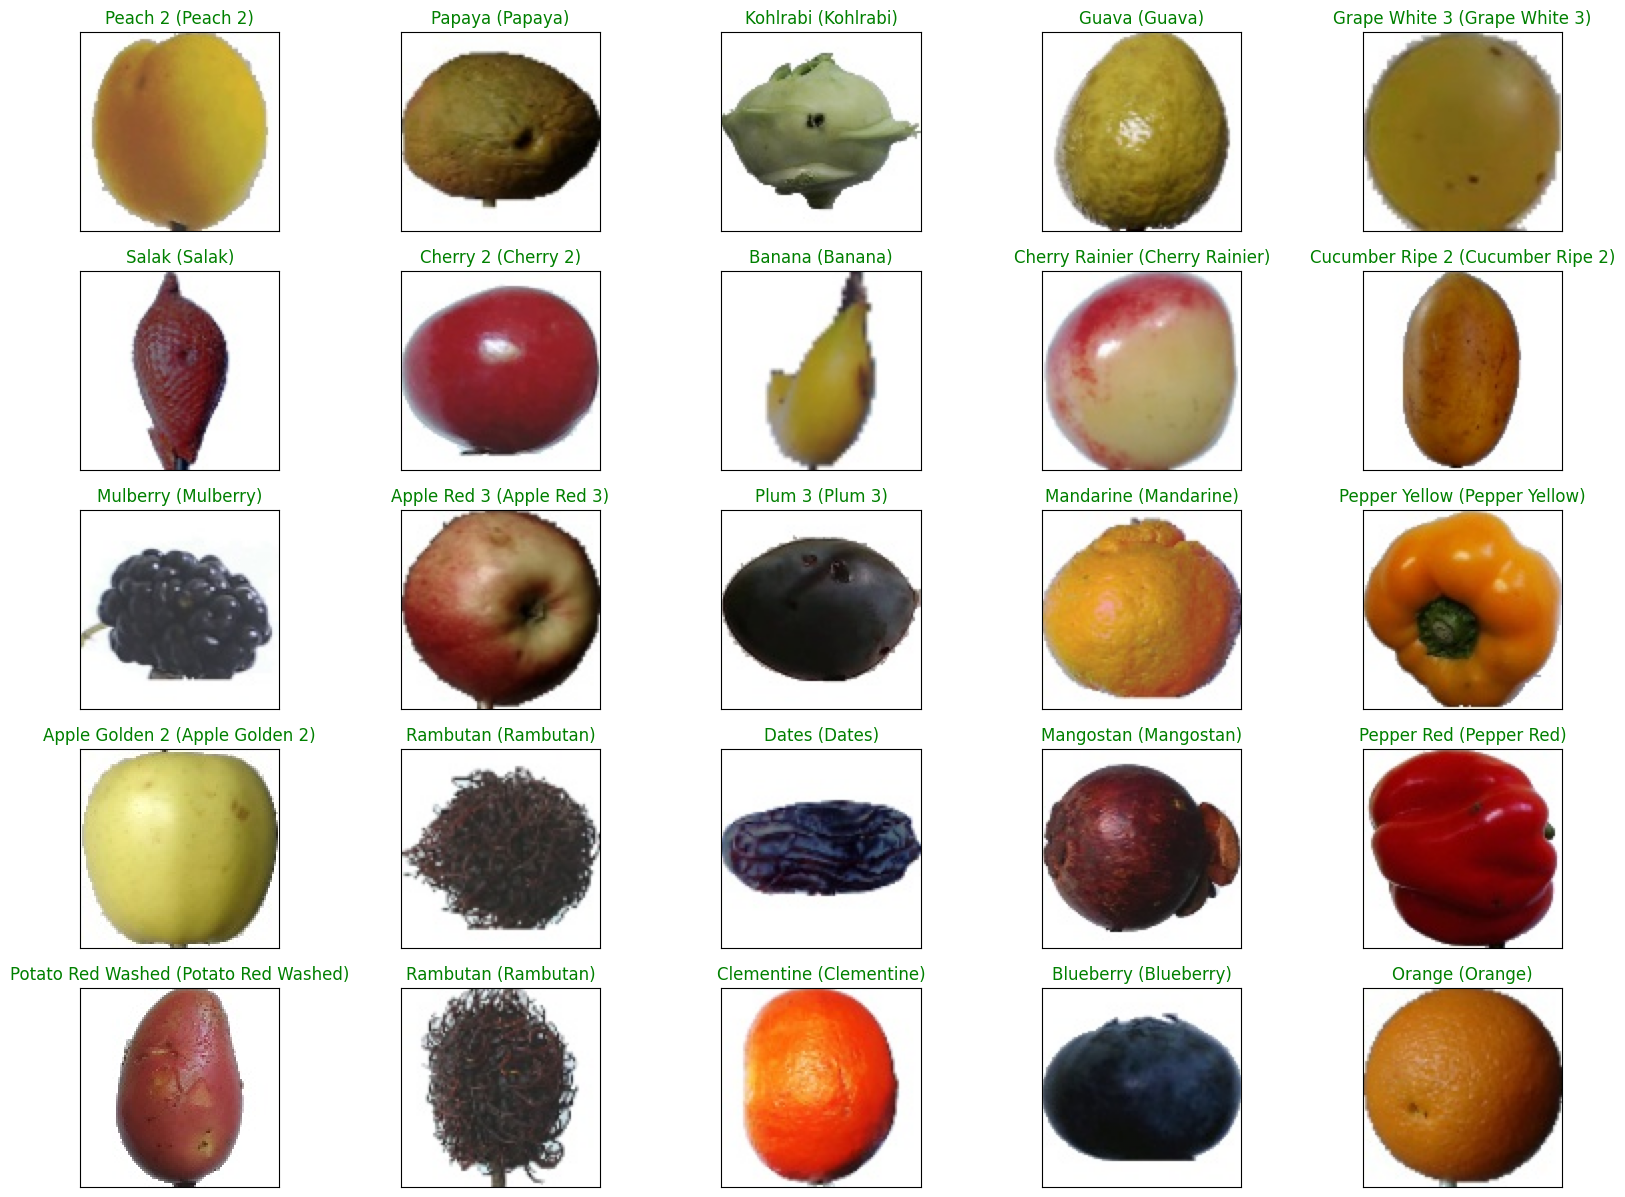

In [31]:
# using model to predict on test data
Y_pred = transfer_learning_model.predict(X_test)

fig = plt.figure(figsize=(20, 15))
for i, idx in enumerate(np.random.choice(X_test.shape[0], size=25, replace=False)):
    ax = fig.add_subplot(5, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(X_test[idx]))
    pred_idx = np.argmax(Y_pred[idx])
    true_idx = np.argmax(Y_test[idx])
    ax.set_title("{} ({})".format(labels[pred_idx], labels[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))

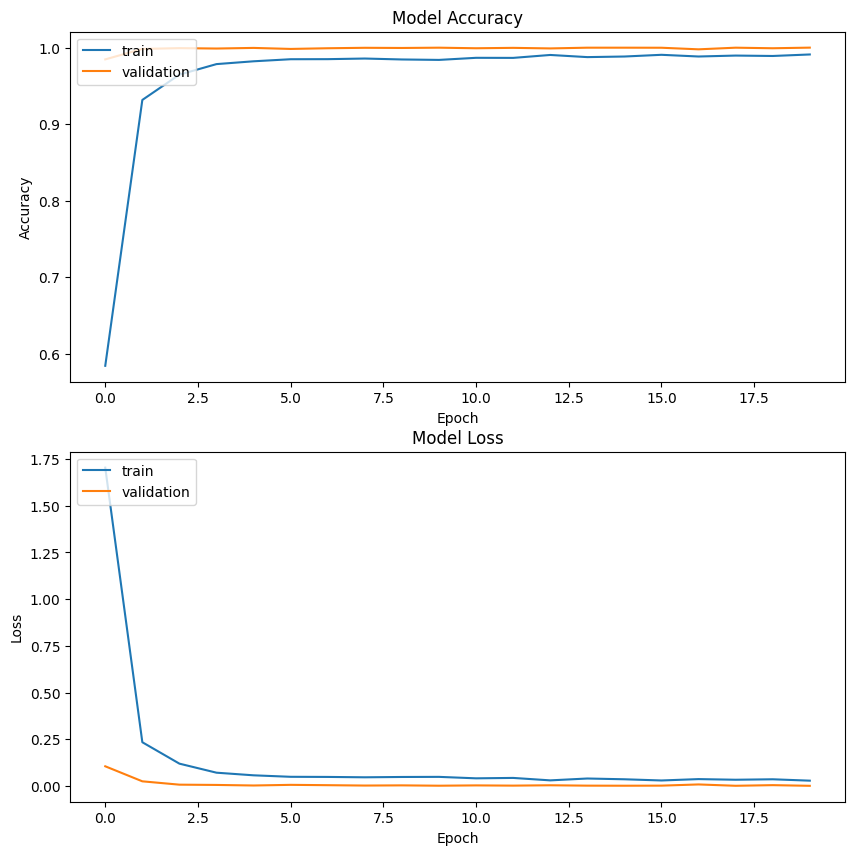

In [33]:
#plotting curves for the transfer learning model

plt.figure(1, figsize = (10, 10))  
plt.subplot(211)  
plt.plot(transfer_learning_cnn.history['accuracy'])  
plt.plot(transfer_learning_cnn.history['val_accuracy'])  
plt.title('Model Accuracy')  
plt.ylabel('Accuracy')  
plt.xlabel('Epoch')  
plt.legend(['train', 'validation'], loc='upper left')   

# plotting model loss 
plt.subplot(212)  
plt.plot(transfer_learning_cnn.history['loss'])  
plt.plot(transfer_learning_cnn.history['val_loss'])  
plt.title('Model Loss')  
plt.ylabel('Loss')  
plt.xlabel('Epoch')  
plt.legend(['train', 'validation'], loc='upper left')  
plt.show()